Install dan import library

In [ ]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.

In [ ]:
!pip install nlp-id
!pip install Sastrawi
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 5.0 MB/s 
     |████████████████████████████████| 31.0 MB 188 kB/s 
     |████████████████████████████████| 1.5 MB 56.8 MB/s 
  Created wheel for nlp-id: filename=nlp_id-0.1.13.0-py3-none-any.whl size=8074943 sha256=b3dde69c4b1bd6cb05f5bc97f8f4bd042ae6839373ece2c19398e28d2e472e14
  Stored in directory: /root/.cache/pip/wheels/c9/40/1e/1f65670842151a87e008b5df647bf5d8b034e762e1934fd7f3
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449921 sha256=fe6fefe57f86525ad840934673a5b95c874a49c80733ea94db81bd75d2c5fd12
  Stored in directory: /root/.cache/pip/wheels/23/18/48/8fd6ec11da38406b309470566d6f099c04805d2ec61d7829e7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=287031680208c87928c19c888cd8c592ea8bd5f632b8b97372ba967724bb3447
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837

In [ ]:
import pandas as pd
import numpy as np
import csv
import re
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from gensim.models import Word2Vec
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Load data

In [ ]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/muhammadariffaizin/sistem-temu-kembali-informasi/master/2_preprocessing/bungs_preprocessed.csv')
data_raw.head()

,Unnamed: 0,Unnamed: 0.1,index,Id,Tweet Time,Url,Tweet Text,Likes Count,Reply Count,Retweet Count,Retweeted Tweet,User Id,User Name,User Location,User Follower Count,User Following Count,User Likes Count,User Tweets Count,text_clean
0,1,1,30578,264202019919777793,2012-11-02 03:07:24+00:00,https://twitter.com/__Bungs/status/26420201991...,Prepare for RCTI program magician session 5 to...,0,0,0,NaN,914271535.0,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,prepare rcti program magician session today
1,5,5,30574,265243251718627328,2012-11-05 00:04:53+00:00,https://twitter.com/__Bungs/status/26524325171...,Pagi2 lampu merah udah pada trouble apalagi pa...,0,0,0,NaN,914271535.0,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,pagi lampu merah sudah pada trouble apalagi pa...
2,6,6,30573,265256199438610433,2012-11-05 00:56:20+00:00,https://twitter.com/__Bungs/status/26525619943...,"Hakim dan jaksa pake narkoba,,,,malu2in instan...",0,0,0,NaN,914271535.0,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,"hakim jaksa pakai narkotika, psikotropika, dan..."
3,7,7,30572,265284306161786880,2012-11-05 02:48:01+00:00,https://twitter.com/__Bungs/status/26528430616...,Oh astaga ga tau nya gw follow tweet org bisu....,0,0,0,NaN,914271535.0,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,astaga tidak tahu saya follow tweet orang bisu...
4,8,8,30571,265290218368823297,2012-11-05 03:11:31+00:00,https://twitter.com/__Bungs/status/26529021836...,Jangan pernah bertahan dengan orang yang harin...,0,0,0,NaN,914271535.0,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,jangan pernah bertahan dengan orang yang hari ...


In [ ]:
data_raw.shape

(48569, 19)

#Pre-processing

In [ ]:
import nltk  

In [ ]:
from nltk.tokenize import word_tokenize  

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
stop_factory = StopWordRemoverFactory()
more_stopword = ['dengan', 'ia','bahwa','oleh','aku','kamu','bukan','nya','iya','user','sih','jadi','deh','rt','kalau','apa','mau','memang']
data_stopword = stop_factory.get_stop_words() + more_stopword # menambah stopword


In [ ]:
more_stopword = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/stki/main/more_stopword.txt', delimiter = "\t")
more_stopword = more_stopword["stopword"].tolist()
stop_factory = StopWordRemoverFactory()
data_stopword = stop_factory.get_stop_words() + more_stopword # menambah stopword

In [ ]:
def preprocess(s):
    hasil=[]
    word_token = word_tokenize(s) #tokenisaai
    for word in word_token:
        word = word.strip().lower()   #case folding
        if word not in data_stopword: #stopword removal
          if word not in en_stops:
            hasil.append(word)
        else:
            continue
    result_sentence = " ".join(hasil).strip() #penggabungan kata hasil pre prosesing
    return result_sentence

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
result_preprocess = []
for i, row in tqdm(data_raw.iterrows(), total=data_raw.shape[0]):
  result_preprocess.append(preprocess(row['text_clean']))
'Done!'

100%|██████████| 48569/48569 [00:12<00:00, 3850.72it/s]


'Done!'

In [ ]:
data_raw['text_clean'] = result_preprocess

In [ ]:
data_raw

,Unnamed: 0,Unnamed: 0.1,index,Id,Tweet Time,Url,Tweet Text,Likes Count,Reply Count,Retweet Count,Retweeted Tweet,User Id,User Name,User Location,User Follower Count,User Following Count,User Likes Count,User Tweets Count,text_clean
0,1,1,30578,264202019919777793,2012-11-02 03:07:24+00:00,https://twitter.com/__Bungs/status/26420201991...,Prepare for RCTI program magician session 5 to...,0,0,0,NaN,9.142715e+08,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,prepare rcti program magician session today
1,5,5,30574,265243251718627328,2012-11-05 00:04:53+00:00,https://twitter.com/__Bungs/status/26524325171...,Pagi2 lampu merah udah pada trouble apalagi pa...,0,0,0,NaN,9.142715e+08,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,pagi lampu merah trouble pengguna jalan huffss
2,6,6,30573,265256199438610433,2012-11-05 00:56:20+00:00,https://twitter.com/__Bungs/status/26525619943...,"Hakim dan jaksa pake narkoba,,,,malu2in instan...",0,0,0,NaN,9.142715e+08,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,"hakim jaksa pakai narkotika , psikotropika , o..."
3,7,7,30572,265284306161786880,2012-11-05 02:48:01+00:00,https://twitter.com/__Bungs/status/26528430616...,Oh astaga ga tau nya gw follow tweet org bisu....,0,0,0,NaN,9.142715e+08,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,astaga tahu follow tweet orang bisu ckckck maaf
4,8,8,30571,265290218368823297,2012-11-05 03:11:31+00:00,https://twitter.com/__Bungs/status/26529021836...,Jangan pernah bertahan dengan orang yang harin...,0,0,0,NaN,9.142715e+08,__Bungs,Indonesia,3788.0,1449.0,459936.0,105430.0,jangan pernah bertahan orang hari pernah terse...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48564,67943,67943,30586,1588311217956786176,2022-11-03 23:24:38+00:00,https://twitter.com/RaniKancana__/status/15883...,@__Bungs Obatnya habis. Aku diblok,1,0,0,NaN,1.303616e+18,RaniKancana__,Indonesia,59088.0,12916.0,303263.0,303379.0,obat habis diblok
48565,67944,67944,30585,1588316216158224384,2022-11-03 23:44:30+00:00,https://twitter.com/dedek_1209/status/15883162...,@__Bungs Luka² kita...\nAdl bukti perjuangan p...,1,0,0,NaN,1.417138e+18,dedek_1209,dimana ada 💙,7295.0,3741.0,27492.0,61473.0,luka bukti perjuangan panjang lalui perjalanan...
48566,67945,67945,30584,1588414324803969024,2022-11-04 06:14:21+00:00,https://twitter.com/rm_wiyono2/status/15884143...,@__Bungs @KPK_RI Perasaan formula e ini sepert...,0,0,0,NaN,1.449047e+18,rm_wiyono2,indonesia,985.0,1122.0,6122.0,6352.0,perasaan formula cacing kepanasan ruwet mbulet...
48567,67946,67946,30583,1588440058818088960,2022-11-04 07:56:36+00:00,https://twitter.com/nuansabening28/status/1588...,@__Bungs Order brp botol bung 🤩,2,1,0,NaN,9.498017e+17,nuansabening28,Indonesia,20443.0,14941.0,59712.0,122825.0,order berapa botol bung


In [ ]:
result_preprocess

['prepare rcti program magician session today',
 'pagi lampu merah trouble pengguna jalan huffss',
 'hakim jaksa pakai narkotika , psikotropika , obat terlarang malu instansi hukum langsung perlu pakai lama',
 'astaga tahu follow tweet orang bisu ckckck maaf',
 'jangan pernah bertahan orang hari pernah tersenyum walaupun wajah kelihatan bahagia radicalboot',
 'economic challenges topic kongkalikong kriminalisasi sektor minyak gas bumi bicara bioremediation case',
 'nothing life feared understood',
 'semoga kejaksaan kena getah atas kasus bioremidiasi chevron',
 'hidup terasa indah ngopi ember',
 'besar kecil hasil didapatkan tetap disyukuri dinikmati keterpaksaan',
 'learn loving life',
 'leak tertangkap warga kapuas sehabis makan anak orok manusia kalteng',
 'silakan pilih lagu votethesong',
 'kangen sama komunitas sekte komik',
 'youtube children bodom everytime',
 'hidup terasa indah sruputtt kopi maaf terlambat share vradio',
 'real madrid dortmund kickoff champions league sctv',
 

In [ ]:
# Here we store the processed sentences and their label
processed_data = []

for index, row in data_raw.iterrows():
    words_broken_up = row['text_clean']
    # This eliminates any fields that may be blank after preprocessing
    if len(words_broken_up) > 0:
        processed_data.append(words_broken_up)

In [ ]:
processed_data

['prepare rcti program magician session today',
 'pagi lampu merah trouble pengguna jalan huffss',
 'hakim jaksa pakai narkotika , psikotropika , obat terlarang malu instansi hukum langsung perlu pakai lama',
 'astaga tahu follow tweet orang bisu ckckck maaf',
 'jangan pernah bertahan orang hari pernah tersenyum walaupun wajah kelihatan bahagia radicalboot',
 'economic challenges topic kongkalikong kriminalisasi sektor minyak gas bumi bicara bioremediation case',
 'nothing life feared understood',
 'semoga kejaksaan kena getah atas kasus bioremidiasi chevron',
 'hidup terasa indah ngopi ember',
 'besar kecil hasil didapatkan tetap disyukuri dinikmati keterpaksaan',
 'learn loving life',
 'leak tertangkap warga kapuas sehabis makan anak orok manusia kalteng',
 'silakan pilih lagu votethesong',
 'kangen sama komunitas sekte komik',
 'youtube children bodom everytime',
 'hidup terasa indah sruputtt kopi maaf terlambat share vradio',
 'real madrid dortmund kickoff champions league sctv',
 

In [ ]:
len(processed_data)

48550

#Word2Vec

In [ ]:
model = Word2Vec(processed_data, min_count=1)

In [ ]:
# Getting the vector of a sentence based on average of all the word vectors in the sentence
# We get the average as this accounts for different sentence lengths

def ReturnVector(x):
    try:
        return model[x]
    except:
        return np.zeros(100)
    
def Sentence_Vector(sentence):
    word_vectors = list(map(lambda x: ReturnVector(x), sentence))
    return np.average(word_vectors, axis=0).tolist()

X = []
for data_x in processed_data:
    X.append(Sentence_Vector(data_x))

<ipython-input-17-aa9e5d7d91e8>:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return model[x]


In [ ]:
X_np = np.array(X)
X_np.shape

(48550, 100)

Clustering

In [ ]:
from sklearn import cluster # Kmeans clustering
from sklearn import metrics # Metrics for evaluation
from sklearn.decomposition import PCA #PCA
from sklearn.manifold import TSNE #TSNE

In [ ]:
# Training for 2 clusters (Fake and Real)
kmeans = cluster.KMeans(n_clusters=2, verbose=1)

# Fit predict will return labels
clustered = kmeans.fit_predict(X_np)

Initialization complete
Iteration 0, inertia 6669.8908439689385.
Iteration 1, inertia 4375.742792164207.
Iteration 2, inertia 4363.347694722316.
Iteration 3, inertia 4362.038261905436.
Iteration 4, inertia 4361.8929647092555.
Converged at iteration 4: center shift 1.5594126654894532e-07 within tolerance 1.9660599043359145e-07.
Initialization complete
Iteration 0, inertia 5579.71977391041.
Iteration 1, inertia 4370.710925627469.
Iteration 2, inertia 4362.762080712647.
Iteration 3, inertia 4361.968175939054.
Iteration 4, inertia 4361.896558836486.
Iteration 5, inertia 4361.88966277938.
Converged at iteration 5: center shift 2.4958258398288276e-08 within tolerance 1.9660599043359145e-07.
Initialization complete
Iteration 0, inertia 6076.124816848165.
Iteration 1, inertia 4362.680726358176.
Iteration 2, inertia 4361.901904296312.
Iteration 3, inertia 4361.889561419221.
Converged at iteration 3: center shift 1.885954480079069e-08 within tolerance 1.9660599043359145e-07.
Initialization compl

In [ ]:
data_raw['y_km'] = clustered

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

In [ ]:
more_stopword = pd.read_csv('https://raw.githubusercontent.com/kelvin2401/stki/main/more_stopword.txt', delimiter = "\t")
more_stopword = more_stopword["stopword"].tolist()
stop_factory = StopWordRemoverFactory()
data_stopword = stop_factory.get_stop_words() + more_stopword # menambah stopword

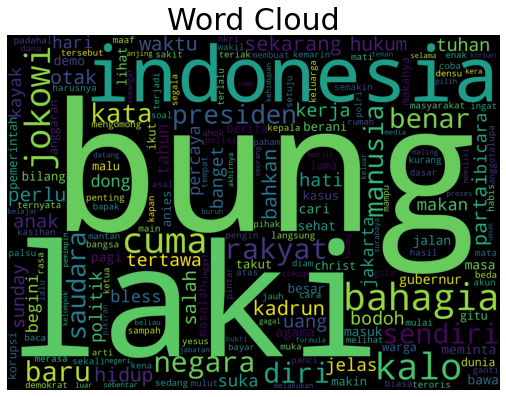

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==0]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

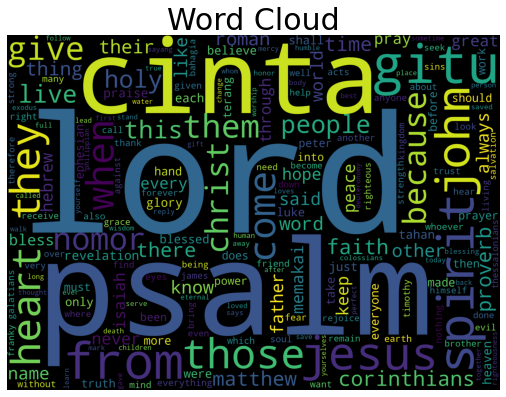

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==1]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

In [ ]:
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI


In [ ]:

features = X_np
for i in range(2, 11):
  seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap
  km = KMeans(n_clusters=i, init='random', max_iter=300, random_state = seed)
  km.fit(features)

  # Hasil clusteringnya
  C_km = km.predict(features)
 
  print('Jumlah klaster:', i)
  print('Silhouette: ', round(siluet(features, C_km), 4))
  print('')

Jumlah klaster: 2
Silhouette:  0.4618

Jumlah klaster: 3
Silhouette:  0.2507

Jumlah klaster: 4
Silhouette:  0.1726

Jumlah klaster: 5
Silhouette:  0.1434

Jumlah klaster: 6
Silhouette:  0.1246

Jumlah klaster: 7
Silhouette:  0.1088

Jumlah klaster: 8
Silhouette:  0.1068

Jumlah klaster: 9
Silhouette:  0.1007

Jumlah klaster: 10
Silhouette:  0.0912



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


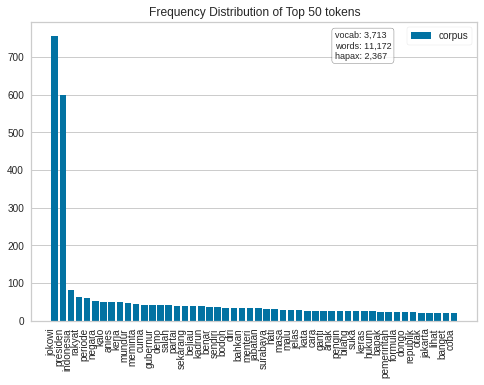

In [ ]:
corpus = data_raw[data_raw.y_km==0]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

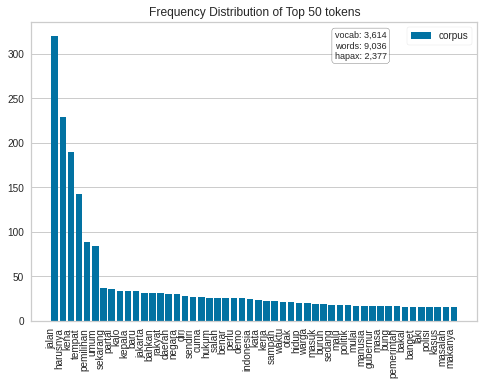

In [ ]:
corpus = data_raw[data_raw.y_km==1]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

#TFIDF

In [ ]:
vectorizer = TfidfVectorizer()
response = vectorizer.fit_transform(data_raw['text_clean'])

In [ ]:
km = KMeans(n_clusters=5, init='random', max_iter=300, random_state = seed)
km.fit(response)

KMeans(init='random', n_clusters=5, random_state=99)

In [ ]:
C_km = km.predict(response)
data_raw['y_km'] = C_km

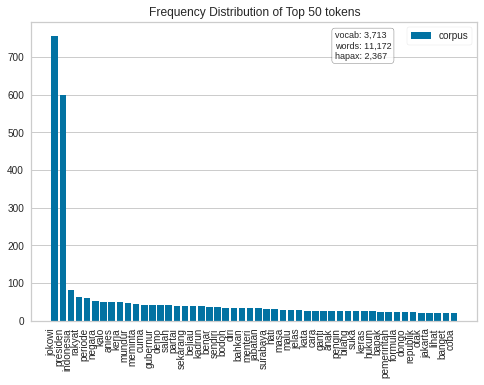

In [ ]:
corpus = data_raw[data_raw.y_km==0]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

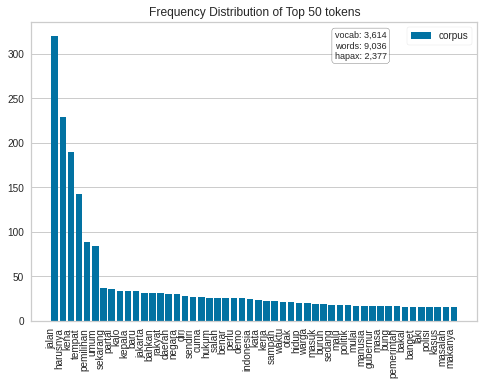

In [ ]:
corpus = data_raw[data_raw.y_km==1]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

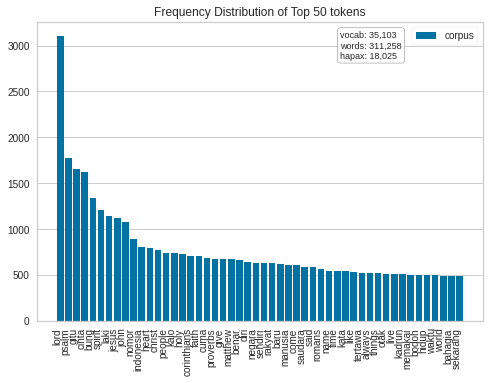

In [ ]:
corpus = data_raw[data_raw.y_km==2]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

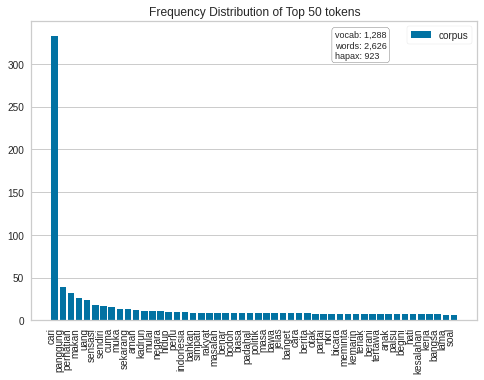

In [ ]:
corpus = data_raw[data_raw.y_km==3]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

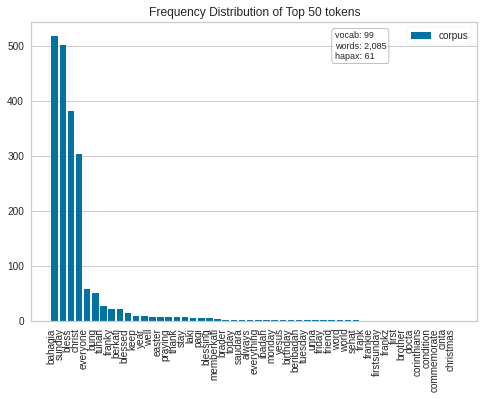

In [ ]:
corpus = data_raw[data_raw.y_km==4]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

In [ ]:
features = response
for i in range(2, 11):
  seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap
  km = KMeans(n_clusters=i, init='random', max_iter=300, random_state = seed)
  km.fit(features)

  # Hasil clusteringnya
  C_km = km.predict(features)
 
  print('Jumlah klaster:', i)
  print('Silhouette: ', round(siluet(features, C_km), 4))
  print('')

Jumlah klaster: 2


NameError: ignored

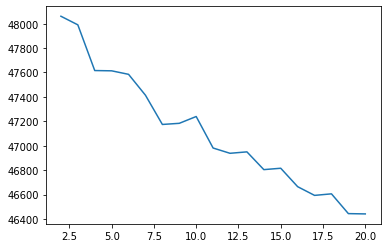

In [ ]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, verbose=1)
features = response
# Fit predict will return labels
clustered = kmeans.fit_predict(features)

Initialization complete
Iteration 0, inertia 94144.47667425679.
Iteration 1, inertia 47950.21098988797.
Iteration 2, inertia 47890.25939766511.
Iteration 3, inertia 47834.70404827672.
Iteration 4, inertia 47800.804693294675.
Iteration 5, inertia 47750.122742810854.
Iteration 6, inertia 47733.987669933136.
Iteration 7, inertia 47722.05390867165.
Iteration 8, inertia 47715.35082930491.
Iteration 9, inertia 47712.87265135513.
Iteration 10, inertia 47712.67139680876.
Iteration 11, inertia 47712.615442952556.
Iteration 12, inertia 47712.15723863813.
Iteration 13, inertia 47710.98165681037.
Iteration 14, inertia 47709.04019548508.
Iteration 15, inertia 47708.30813761908.
Iteration 16, inertia 47708.12798380249.
Iteration 17, inertia 47708.093828804136.
Iteration 18, inertia 47708.0852794691.
Iteration 19, inertia 47708.07921684305.
Iteration 20, inertia 47708.075170878205.
Iteration 21, inertia 47708.07400376025.
Iteration 22, inertia 47708.072856129256.
Iteration 23, inertia 47708.072347266

In [ ]:
data_raw['y_km'] = clustered

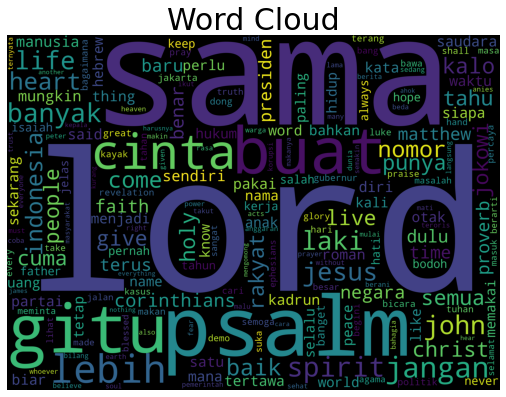

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==0]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

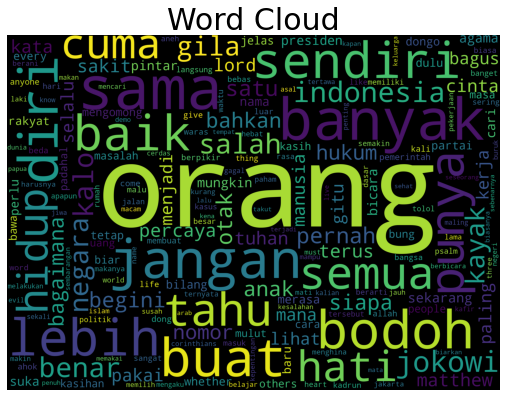

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==1]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

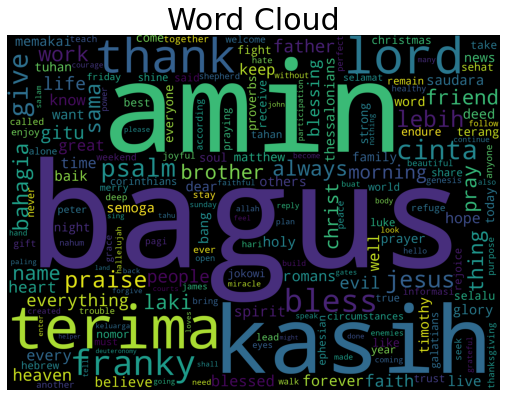

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==2]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

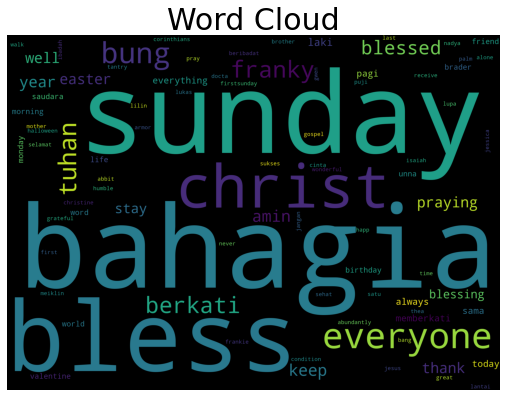

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==3]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

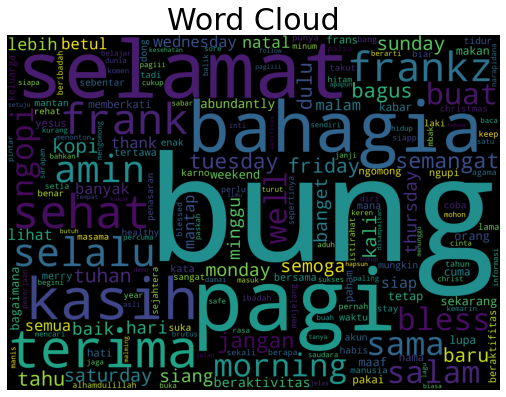

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==4]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


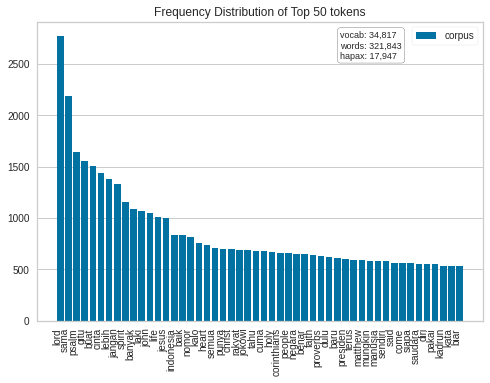

In [ ]:
corpus = data_raw[data_raw.y_km==0]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

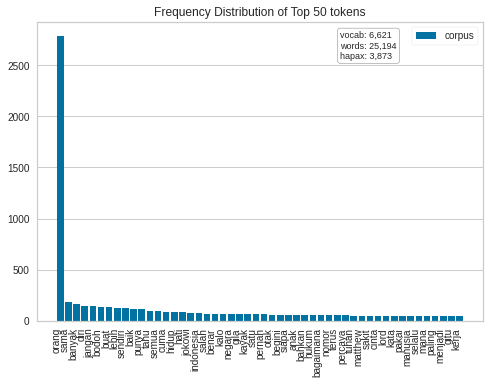

In [ ]:
corpus = data_raw[data_raw.y_km==1]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

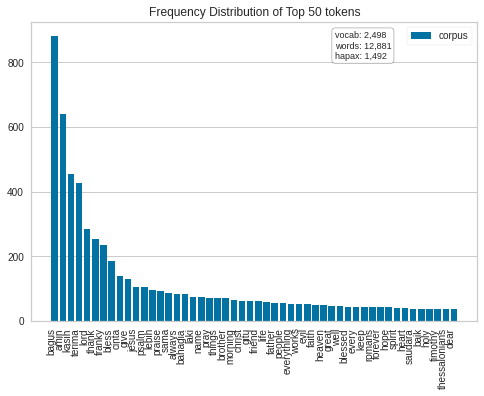

In [ ]:
corpus = data_raw[data_raw.y_km==2]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

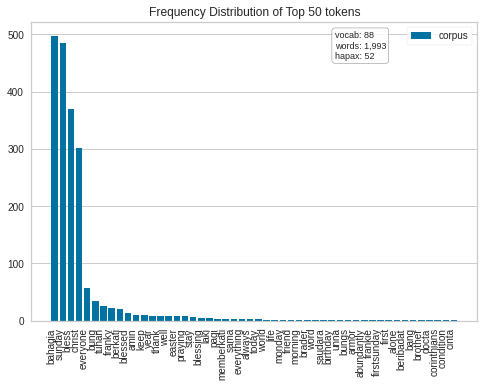

In [ ]:
corpus = data_raw[data_raw.y_km==3]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

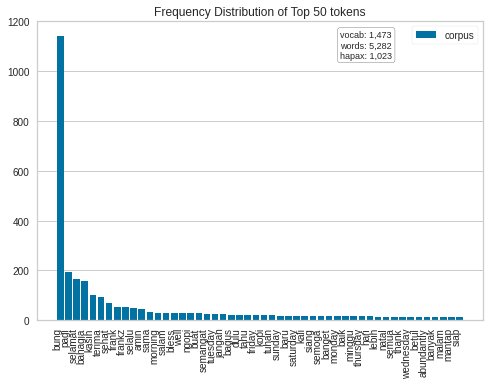

In [ ]:
corpus = data_raw[data_raw.y_km==4]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

#CountVectorizer

In [ ]:
# Generating bag of words features.
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_raw['text_clean'].values)
bow.shape

(48569, 36447)

In [ ]:
features = bow
for i in range(2, 11):
  seed = 99 # Sembarang nilai untuk Random generator, mengapa penting? agar ketika dijalankan ulang nilai randomnya tetap
  km = KMeans(n_clusters=i, init='random', max_iter=300, random_state = seed)
  km.fit(features)

  # Hasil clusteringnya
  C_km = km.predict(features)
 
  print('Jumlah klaster:', i)
  print('Silhouette: ', round(siluet(features, C_km), 4))
  print('')

Jumlah klaster: 2
Silhouette:  0.0103

Jumlah klaster: 3
Silhouette:  0.0142

Jumlah klaster: 4
Silhouette:  0.0161

Jumlah klaster: 5
Silhouette:  0.017

Jumlah klaster: 6
Silhouette:  0.0175

Jumlah klaster: 7
Silhouette:  0.0175

Jumlah klaster: 8
Silhouette:  0.0179

Jumlah klaster: 9
Silhouette:  0.0168

Jumlah klaster: 10
Silhouette:  0.0198



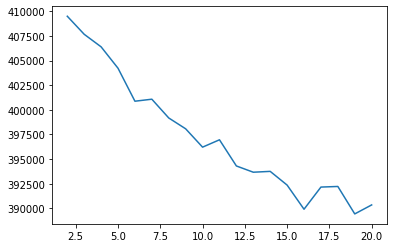

In [ ]:
ssd = []
features = bow
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(features)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, verbose=1)
features = bow
# Fit predict will return labels
clustered = kmeans.fit_predict(features)

Initialization complete
Iteration 0, inertia 555269.0.
Iteration 1, inertia 405872.67469160364.
Iteration 2, inertia 405425.77476957423.
Iteration 3, inertia 404977.87488355266.
Iteration 4, inertia 403589.563095698.
Iteration 5, inertia 402898.74016233126.
Iteration 6, inertia 402733.117019893.
Iteration 7, inertia 402711.72681761975.
Iteration 8, inertia 402708.4702865015.
Iteration 9, inertia 402706.7607544213.
Iteration 10, inertia 402706.3435485506.
Iteration 11, inertia 402706.32780738233.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 604677.0.
Iteration 1, inertia 410542.09720427176.
Iteration 2, inertia 408795.66042454564.
Iteration 3, inertia 407114.8360594403.
Iteration 4, inertia 406098.4747001362.
Iteration 5, inertia 405624.84374358144.
Iteration 6, inertia 405518.8027097443.
Iteration 7, inertia 405426.6786380204.
Iteration 8, inertia 405201.98185707466.
Iteration 9, inertia 405188.97264082404.
Iteration 10, inertia 405188.774

In [ ]:
data_raw['y_km'] = clustered

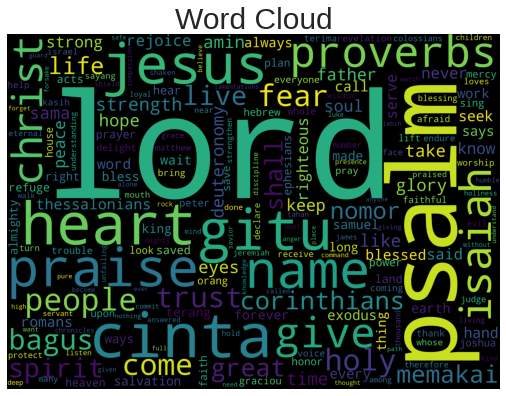

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==0]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

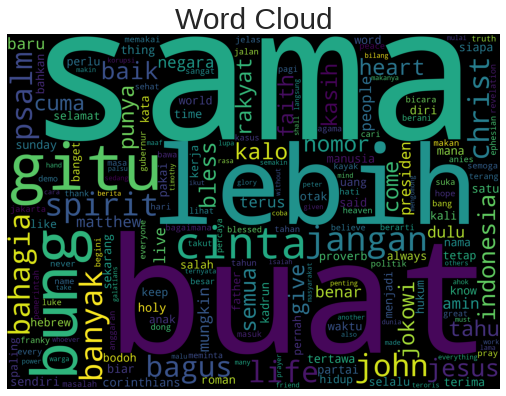

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==1]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

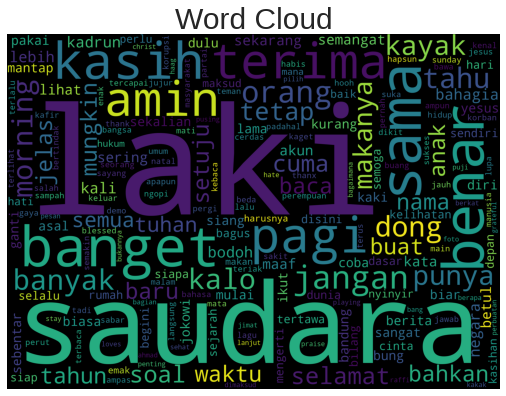

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==2]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

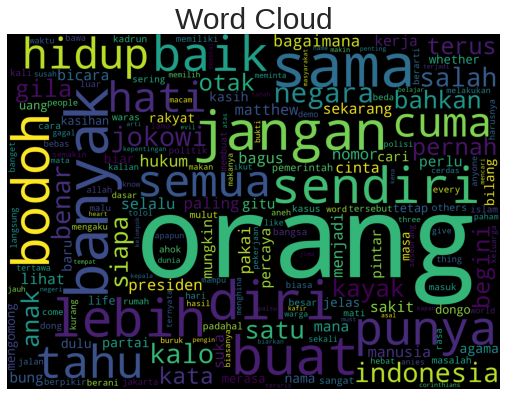

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==3]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

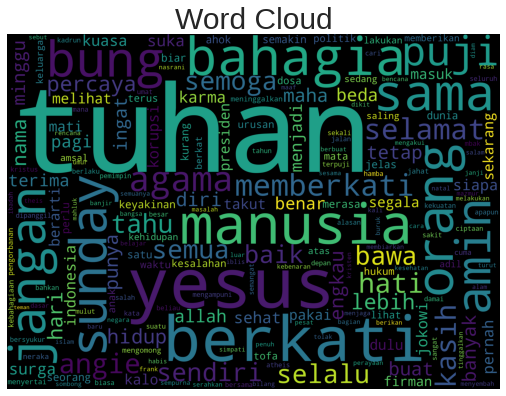

In [ ]:
plt.figure(figsize=(30,20))
subset = data_raw[data_raw.y_km==4]
text = subset['text_clean']
cloud_0 = WordCloud(
                          stopwords=data_stopword,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Word Cloud",fontsize=30)
plt.imshow(cloud_0)

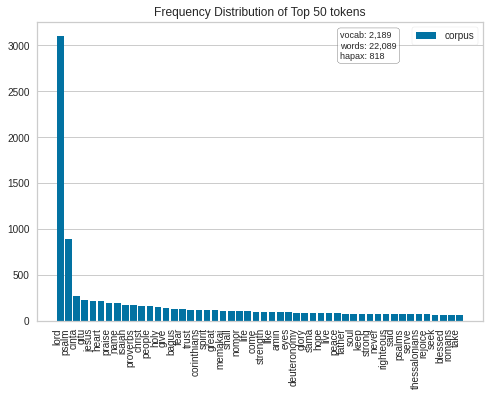

In [ ]:
corpus = data_raw[data_raw.y_km==0]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

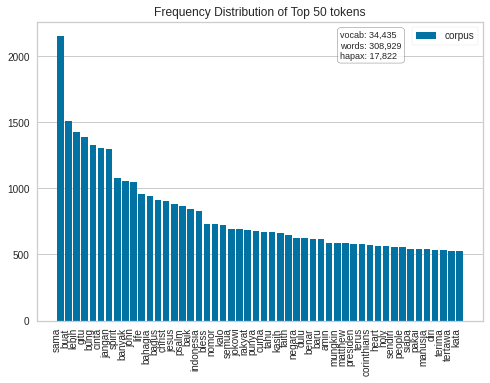

In [ ]:
corpus = data_raw[data_raw.y_km==1]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

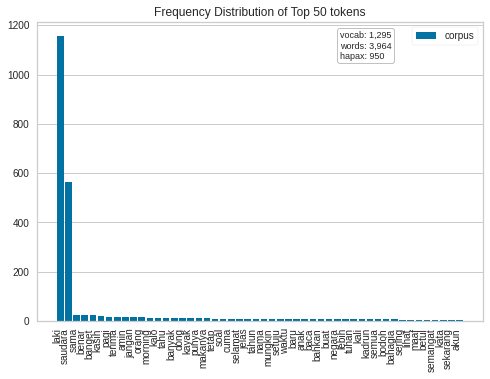

In [ ]:
corpus = data_raw[data_raw.y_km==2]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

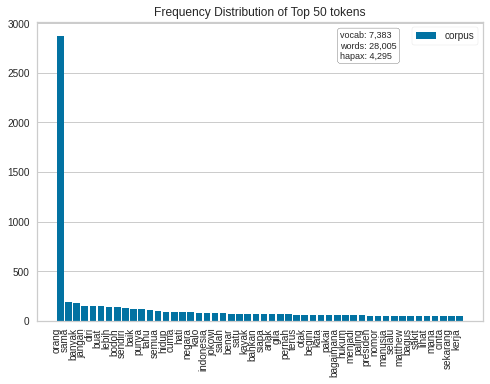

In [ ]:
corpus = data_raw[data_raw.y_km==3]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

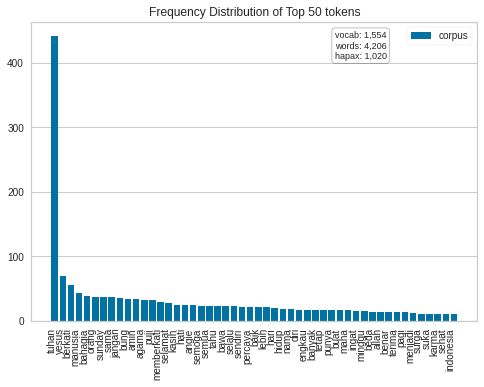

In [ ]:
corpus = data_raw[data_raw.y_km==4]['text_clean']

vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(docs)
visualizer.show()

#Topic Modelling


In [ ]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tokens = [word_tokenize(d) for d in data_raw['text_clean']]

In [ ]:
dictionary = Dictionary(tokens)

In [ ]:
corpus = [dictionary.doc2bow(tweet) for tweet in tokens]

In [ ]:
from gensim import corpora
id2word = corpora.Dictionary(tokens)

In [ ]:
lda_model = LdaModel(corpus, num_topics=10, passes=10, alpha='auto', eta='auto', id2word=id2word)

In [ ]:
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id}: {topic}')

Topic 0: 0.137*"tapi" + 0.030*"will" + 0.023*"your" + 0.019*"that" + 0.018*"have" + 0.017*"paling" + 0.016*"what" + 0.016*"bagus" + 0.015*"life" + 0.013*"cinta"
Topic 1: 0.037*"jelas" + 0.033*"lord" + 0.017*"tersebut" + 0.015*"lawan" + 0.011*"sana" + 0.010*"sayabersamajokowi" + 0.010*"publik" + 0.009*"tangkaphelmifelis" + 0.009*"tangkapaniesbaswedan" + 0.008*"iblis"
Topic 2: 0.063*"tidak" + 0.051*"yang" + 0.025*"sudah" + 0.025*"saja" + 0.020*"jadi" + 0.017*"kalau" + 0.017*"bisa" + 0.016*"orang" + 0.014*"juga" + 0.013*"buat"
Topic 3: 0.017*"ingat" + 0.016*"ketua" + 0.016*"bukti" + 0.015*"melakukan" + 0.014*"selama" + 0.014*"menunggu" + 0.013*"sadar" + 0.012*"john" + 0.011*"percuma" + 0.009*"buruh"
Topic 4: 0.034*"bung" + 0.014*"saudara" + 0.013*"laki-laki" + 0.012*"kasih" + 0.010*"gubernur" + 0.009*"mulai" + 0.009*"ketika" + 0.009*"terima" + 0.009*"sangat" + 0.008*"selamat"
Topic 5: 0.058*"yang" + 0.032*"untuk" + 0.027*"dari" + 0.023*"lebih" + 0.019*"kita" + 0.016*"dalam" + 0.016*"denga

In [ ]:
texts = tokens

In [ ]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
def calc_coherence_values(dictionary, corpus, texts, limit = 12, start = 1, step = 1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus,id2word = dictionary, num_topics = num_topics, alpha=.1, eta=0.1, random_state = 42)
        model_list.append(model)
        print('model created')
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v')
        print(coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

model_list, coherence_values = calc_coherence_values(dictionary = id2word, corpus = corpus, texts = texts, start = 2, limit = 30, step = 2)

model created
0.3819798515997933
model created
0.4638751956104385
model created
0.4503852197754011
model created
0.407482836532531
model created
0.4261804429623782
model created
0.4361635981791559
model created
0.4629711914143884
model created
0.4750391983571972
model created
0.44847055533291336
model created
0.49957034714510706
model created
0.4908841631729524
model created
0.5100380587165391
model created
0.5155463724453495
model created
0.5079708283014414


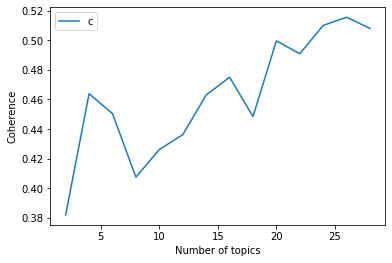

In [ ]:
limit, start, step = 30, 2, 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model = LdaModel(corpus, num_topics=16, passes=10, alpha='auto', eta='auto', id2word=id2word)

In [ ]:
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id}: {topic}')

Topic 0: 0.116*"bung" + 0.029*"selamat" + 0.019*"pagi" + 0.016*"sebelum" + 0.016*"bukti" + 0.015*"negeri" + 0.013*"sekolah" + 0.012*"kelebihan" + 0.012*"tunggu" + 0.012*"kayaknya"
Topic 1: 0.026*"ingin" + 0.024*"bagus" + 0.022*"kader" + 0.018*"selama" + 0.018*"setiap" + 0.017*"termasuk" + 0.011*"berhasil" + 0.011*"pasang" + 0.010*"morning" + 0.010*"something"
Topic 2: 0.028*"padahal" + 0.020*"nomor" + 0.020*"them" + 0.019*"they" + 0.018*"psalm" + 0.018*"terang" + 0.018*"belum" + 0.017*"media" + 0.015*"babi" + 0.014*"more"
Topic 3: 0.029*"begitu" + 0.026*"partai" + 0.025*"presiden" + 0.022*"cuma" + 0.021*"nama" + 0.019*"sebagai" + 0.015*"bicara" + 0.014*"percaya" + 0.013*"saja" + 0.013*"dong"
Topic 4: 0.035*"begini" + 0.029*"kasus" + 0.025*"gitu" + 0.020*"mulut" + 0.018*"diam" + 0.015*"secara" + 0.014*"tanya" + 0.014*"mampu" + 0.012*"sana" + 0.012*"capres"
Topic 5: 0.043*"rakyat" + 0.033*"pasti" + 0.031*"bodoh" + 0.019*"berani" + 0.019*"masalah" + 0.018*"ketika" + 0.017*"takut" + 0.014*